In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
df.shape

(30000, 25)

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

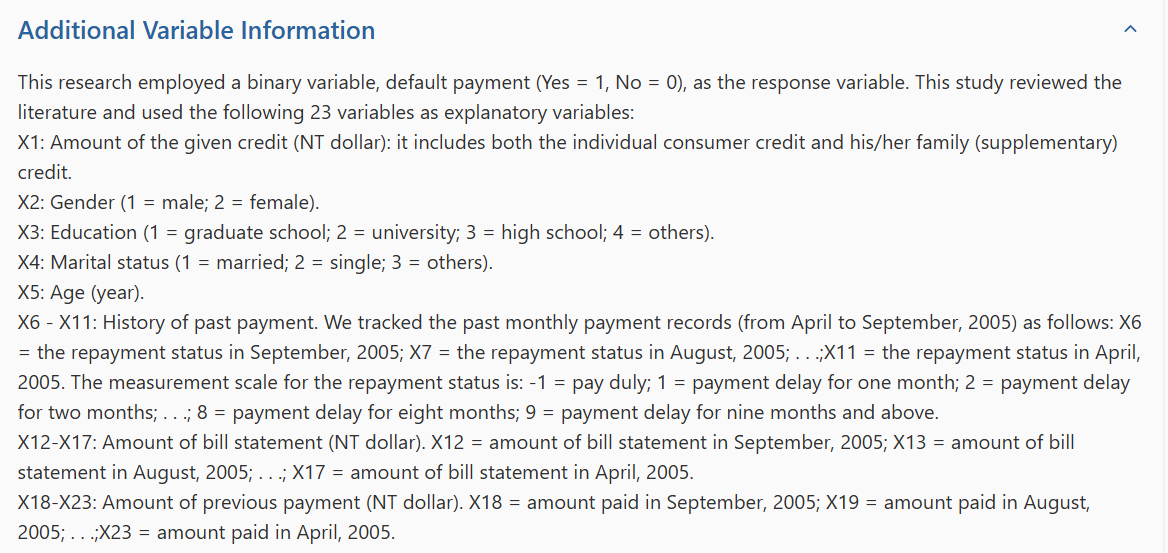

# Data Exploration

- Number of columns = 25
- Number of rows = 30000
- No missing data
- There are 2 object columns (but one of them is an ID)
    - PAY_1 is marked as object but it should be numeric coumn since it represents history of past payments as a number.
        - <i>There is a Not Available value which is not defined in the data dictionary.</i>
- There are 23 numeric columns
- default payment next month is a target variable based on problem statement
- That means there are 23 feature variables (excluding the ID column)

## ID Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [9]:
# Explore ID Column

df['ID'].nunique()

# unique count of ID is 29687 while total rows are 30000. This means the column is not unique as the data dictionary suggests.
# Lets try to see which IDs are duplicated.

29687

In [10]:
id_counts = df['ID'].value_counts()
id_counts.value_counts()

# There are 313 ID which are duplicated. Lets 

count
1    29374
2      313
Name: count, dtype: int64

In [11]:
# We will now drop these duplicate ID rows only and only if all other columns match in values.

df.drop_duplicates(inplace = True)

In [12]:
# lets recheck if the ID column has duplicates

df['ID'].value_counts().value_counts()

# Same ID rows have different values in other column, so lets check again

count
1    29374
2      313
Name: count, dtype: int64

In [13]:
# This time lets check the values in the rows for some of the duplicated IDs

dup_id = list(id_counts[id_counts.values == 2].index)

In [14]:
df[df['ID'].isin(dup_id)].sort_values(['ID','LIMIT_BAL']).head(6)

# Every duplicate ID has 1 row which has zero value. Lets drop first row for each duplicate ID

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
15863,01355f46-3f0b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15763,01355f46-3f0b,100000,2,2,2,23,Not available,2,2,2,...,96332,97560,95885,5000,4300,3600,3700,0,7300,0
21972,0170086d-7472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21872,0170086d-7472,100000,2,1,1,25,0,0,-1,0,...,52079,40183,35796,28,103350,1722,1100,1300,2000,0
3384,02e41927-a6df,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3284,02e41927-a6df,60000,2,2,2,21,0,0,0,0,...,25475,26010,26183,1859,1410,910,939,1000,1000,0


In [15]:
df_zero_mask = df == 0

In [16]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [17]:
sum(feature_zero_mask)

315

In [18]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [19]:
df_clean_1['ID'].value_counts()

ID
798fc410-45c1    1
8a8c8f3b-8eb4    1
85698822-43f5    1
0737c11b-be42    1
3b7f77cc-dbc0    1
                ..
ecff42d0-bdc6    1
99d1fa0e-222b    1
95cdd3e7-4f24    1
00d03f02-04cd    1
15d69f9f-5ad3    1
Name: count, Length: 29685, dtype: int64

In [20]:
df_clean_1.shape

(29685, 25)

In [21]:
# lets save the cleaned data for futher use

df_clean_1.to_csv('Data/cleaned_credit_card_data.csv', index=False)

## Continue with rest of the features and responses analysis

In [22]:
# Lets load the cleaned data first before proceeding further wiht analysis

df_clean_1 = pd.read_csv('Data/cleaned_credit_card_data.csv')
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [23]:
df_clean_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [24]:
# Lets look at PAY_1 column, since it is supposed to be a numeric column but shows up as an object

df_clean_1['PAY_1'].value_counts().sort_index()

# There are 2 problems here:
# 1. The is a "Not available" value which is not a number
# 2. There are some values which are not mentioned in the data dictionary like 0, and -2

PAY_1
-1                5047
-2                2476
0                13087
1                 3261
2                 2378
3                  292
4                   63
5                   23
6                   11
7                    9
8                   17
Not available     3021
Name: count, dtype: int64

In [25]:
# Lets remove Not available value from the dataframe

df_clean_2 = df_clean_1[df_clean_1['PAY_1'] != 'Not available'].copy()

In [26]:
# Lets also convert PAY_1 to numeric type

df_clean_2['PAY_1'] = pd.to_numeric(df_clean_2['PAY_1'])

df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [27]:
df_clean_2.shape

(26664, 25)

In [28]:
df['EDUCATION'].value_counts()

# There are 7 unique values in EDUCATION. Based on data dictionary, there must be only 4 unique values.
# 1. Graduate school
# 2. University
# 3. High school
# 4. Others
# 

EDUCATION
2    13884
1    10474
3     4867
0      329
5      275
4      122
6       49
Name: count, dtype: int64

In [29]:
df.loc[df['EDUCATION'].isin([0,5,6]),'EDUCATION'].value_counts()

EDUCATION
0    329
5    275
6     49
Name: count, dtype: int64

In [31]:
df_clean_2.to_csv("Data/df_clean_2.csv")

In [84]:
df_clean_2 = pd.read_csv("Data/df_clean_2.csv")

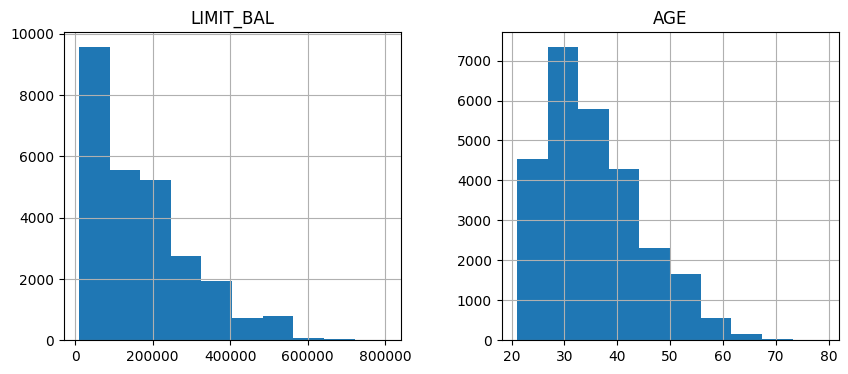

In [85]:
df_clean_2[['LIMIT_BAL','AGE']].hist(figsize=(10,4))
plt.show()

In [86]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [87]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [88]:
replace = [5,6,0]

df_clean_2.loc[df_clean_2['EDUCATION'].isin(replace),'EDUCATION'] = 4

In [89]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [90]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [91]:
df_clean_2.loc[df_clean_2['MARRIAGE'] == 0,'MARRIAGE'] = 3

In [92]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [93]:
df_clean_2.to_csv("Data/df_clean_2.csv")

In [5]:
df_clean_2 = pd.read_csv('Data/df_clean_2.csv')

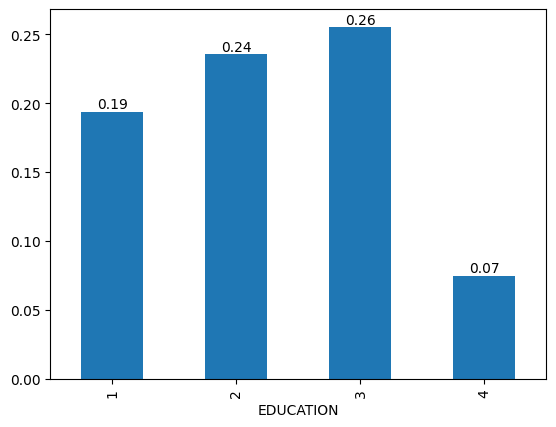

In [10]:
ax = df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend = False)

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')

plt.show()

In [11]:
cat_mapping = {1: "graduate school",
               2: "university",
               3: "high school",
               4: "others"
}

In [13]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [15]:
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [17]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'], dtype=int)

edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [20]:
df_with_ohe = pd.concat([df_clean_2,edu_ohe], axis = 1)

df_with_ohe[['EDUCATION_CAT','graduate school','high school','university','others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [22]:
df_with_ohe.to_csv("Data/Chapter_1_cleaned_data.csv", index = False)

## Exploring Financial History Features

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

df = pd.read_csv("Data/Chapter_1_cleaned_data.csv")

In [24]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,0,0,798fc410-45c1,20000,2,2,1,24,2,2,...,0,0,0,0,1,university,0,0,0,1
1,1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,...,1000,1000,0,2000,1,university,0,0,0,1
2,2,2,85698822-43f5,90000,2,2,2,34,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,3,3,0737c11b-be42,50000,2,2,1,37,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,5,5,ceae2946-47e4,50000,1,1,2,37,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,6,6,d3b8ce26-9c89,500000,1,1,2,29,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,7,7,d6e1911b-54d0,100000,2,2,2,23,0,-1,...,0,581,1687,1542,0,university,0,0,0,1
8,8,8,8421d3b3-2b54,140000,2,3,1,28,0,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,9,9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [25]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION',
       'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'EDUCATION_CAT',
       'graduate school', 'high school', 'others', 'university'],
      dtype='object')

In [26]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [27]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [29]:
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

<Axes: >

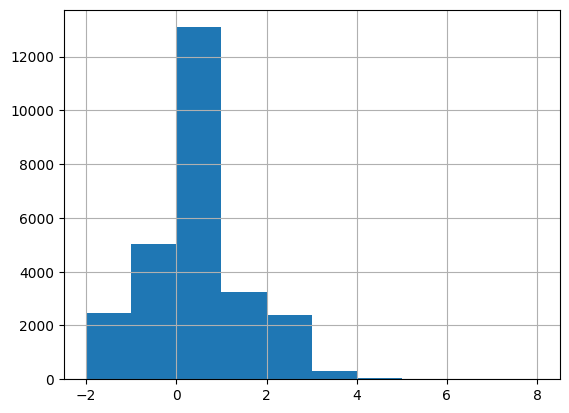

In [30]:
df[pay_feats[0]].hist()

In [32]:
pay_1_bins = np.array(range(-2,10)) - 0.5

pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

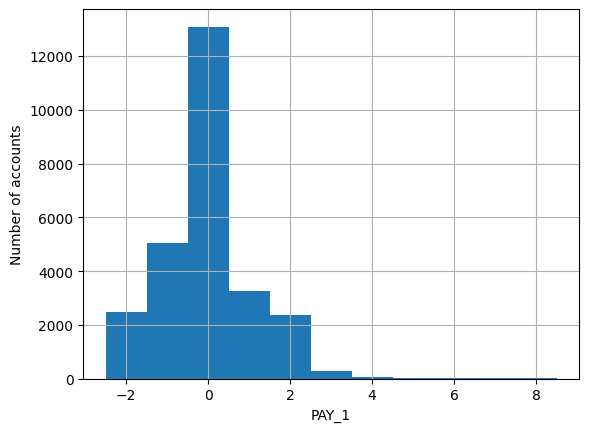

In [33]:
df[pay_feats[0]].hist(bins = pay_1_bins)

plt.xlabel("PAY_1")
plt.ylabel("Number of accounts")

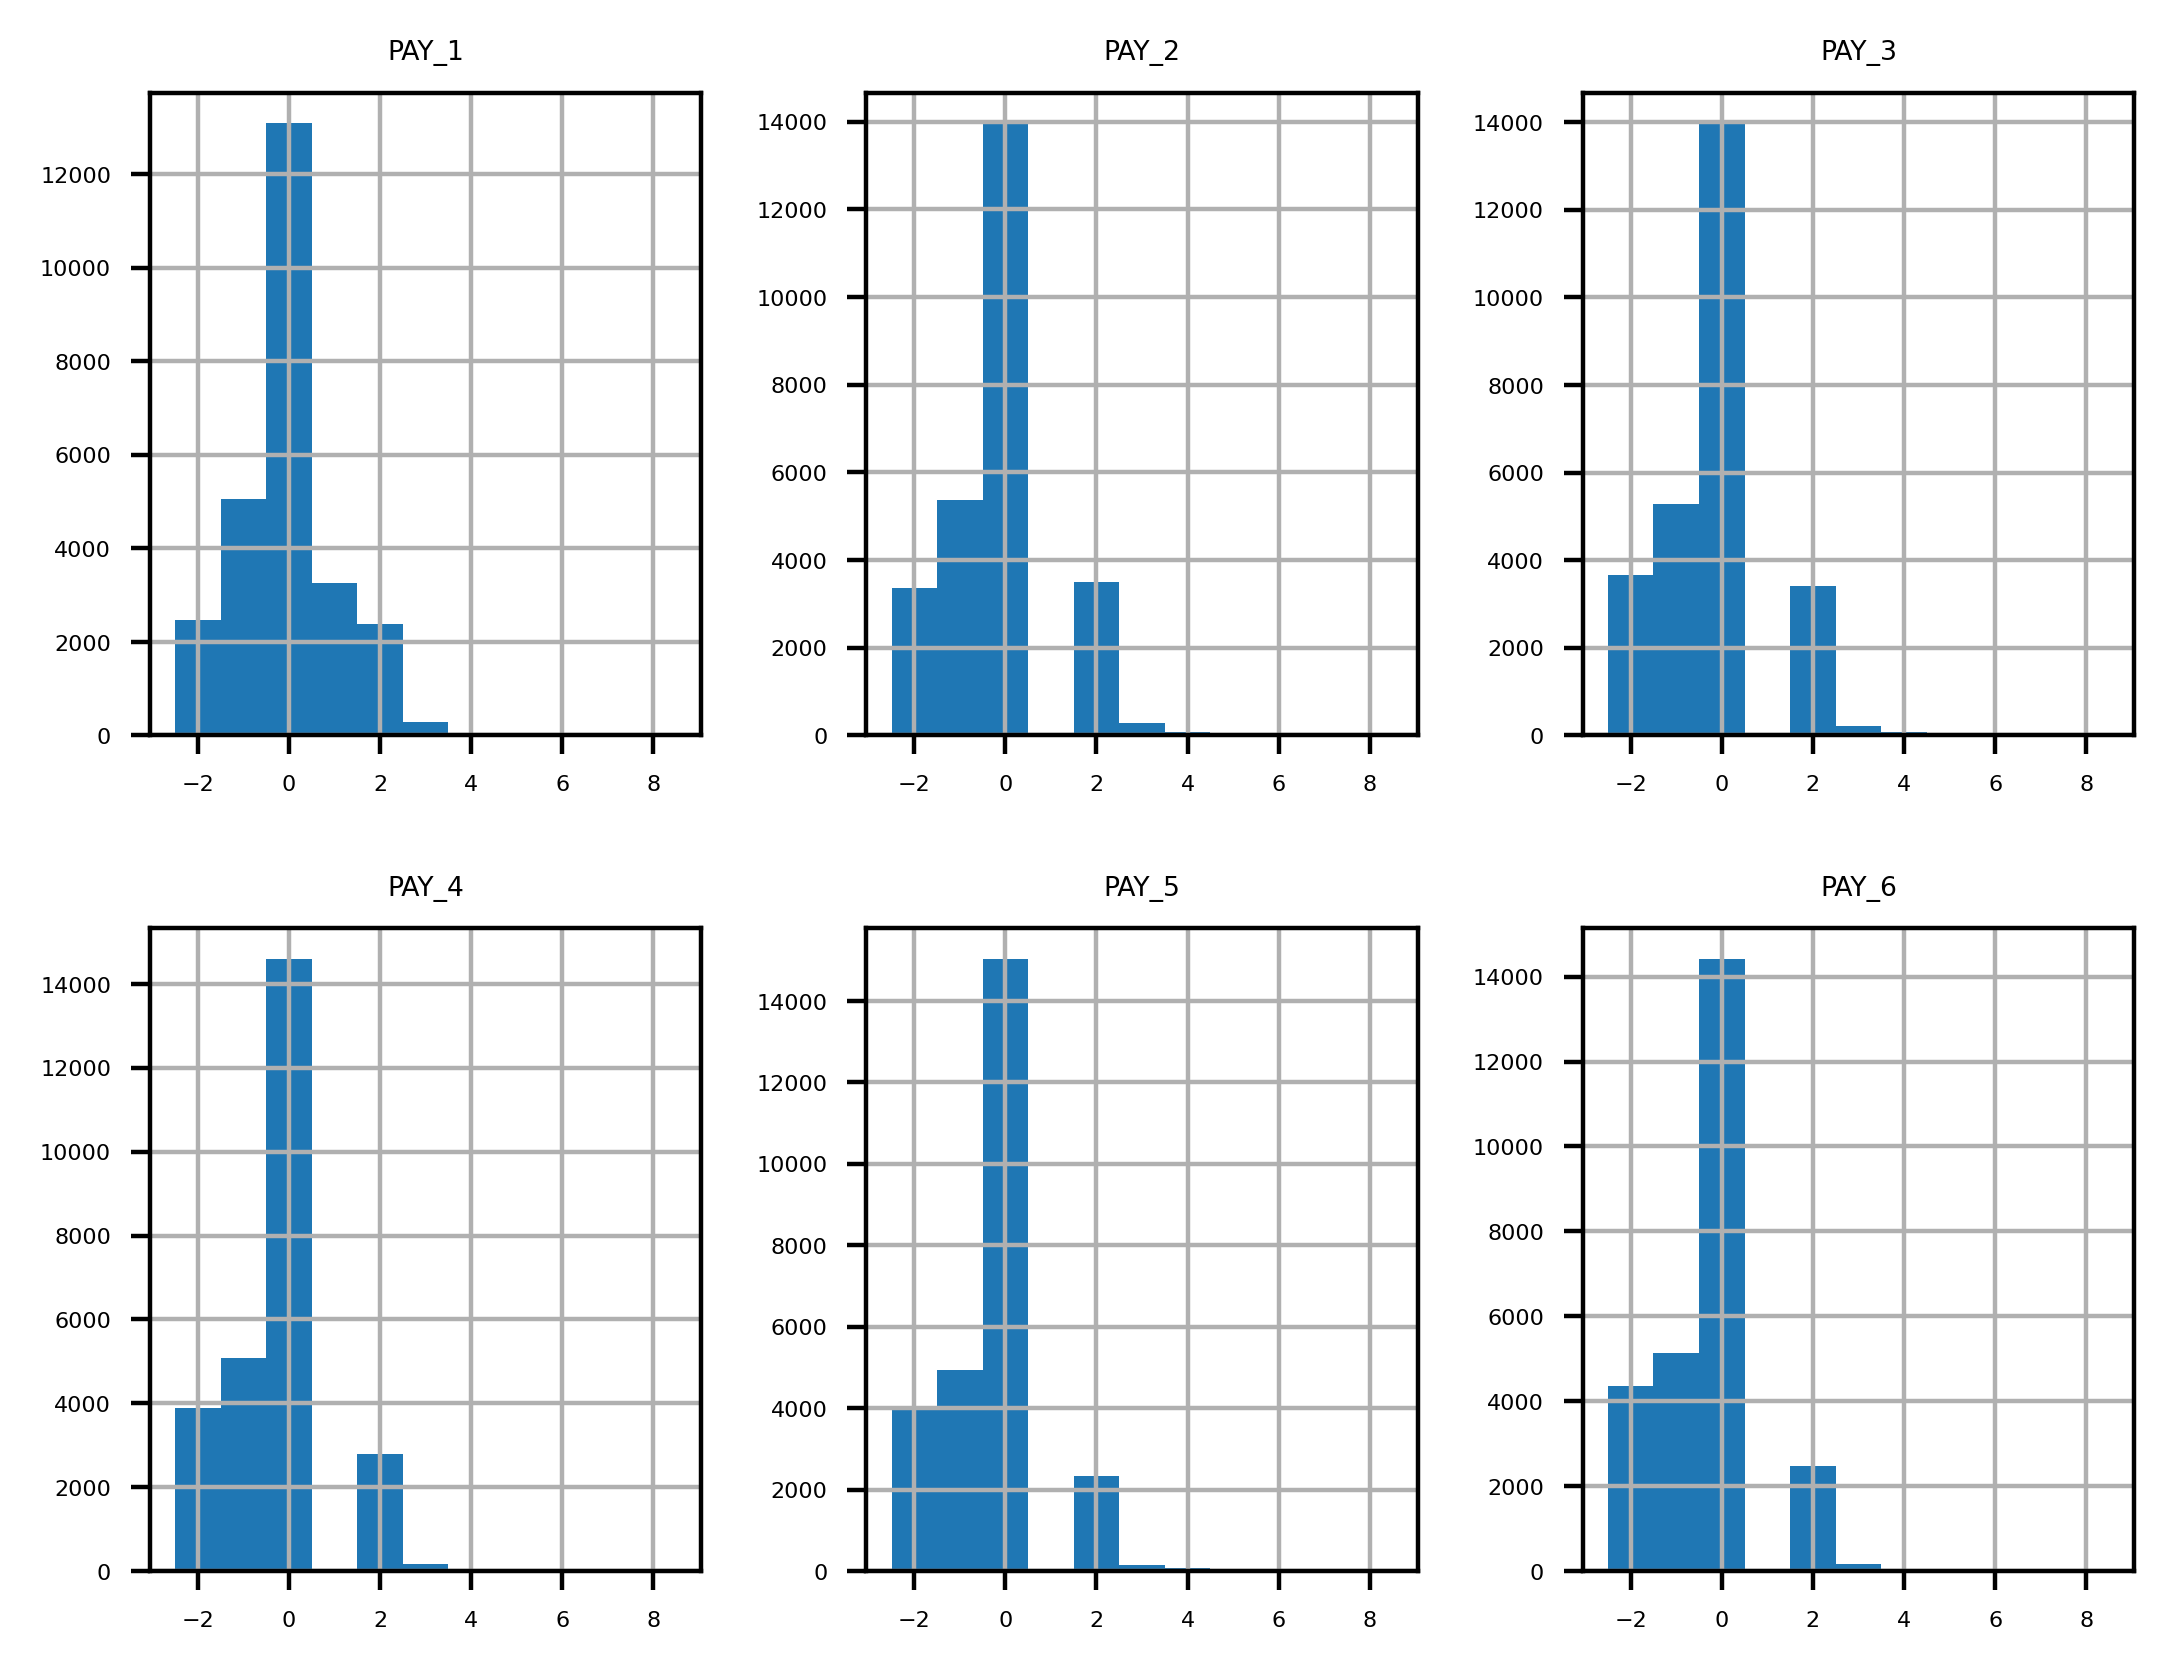

In [40]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins = pay_1_bins, layout=(2,3))

plt.show()

In [41]:
df.loc[df['PAY_2'] == 2, ['PAY_2','PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [42]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION',
       'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'EDUCATION_CAT',
       'graduate school', 'high school', 'others', 'university'],
      dtype='object')

In [43]:
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']

In [46]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

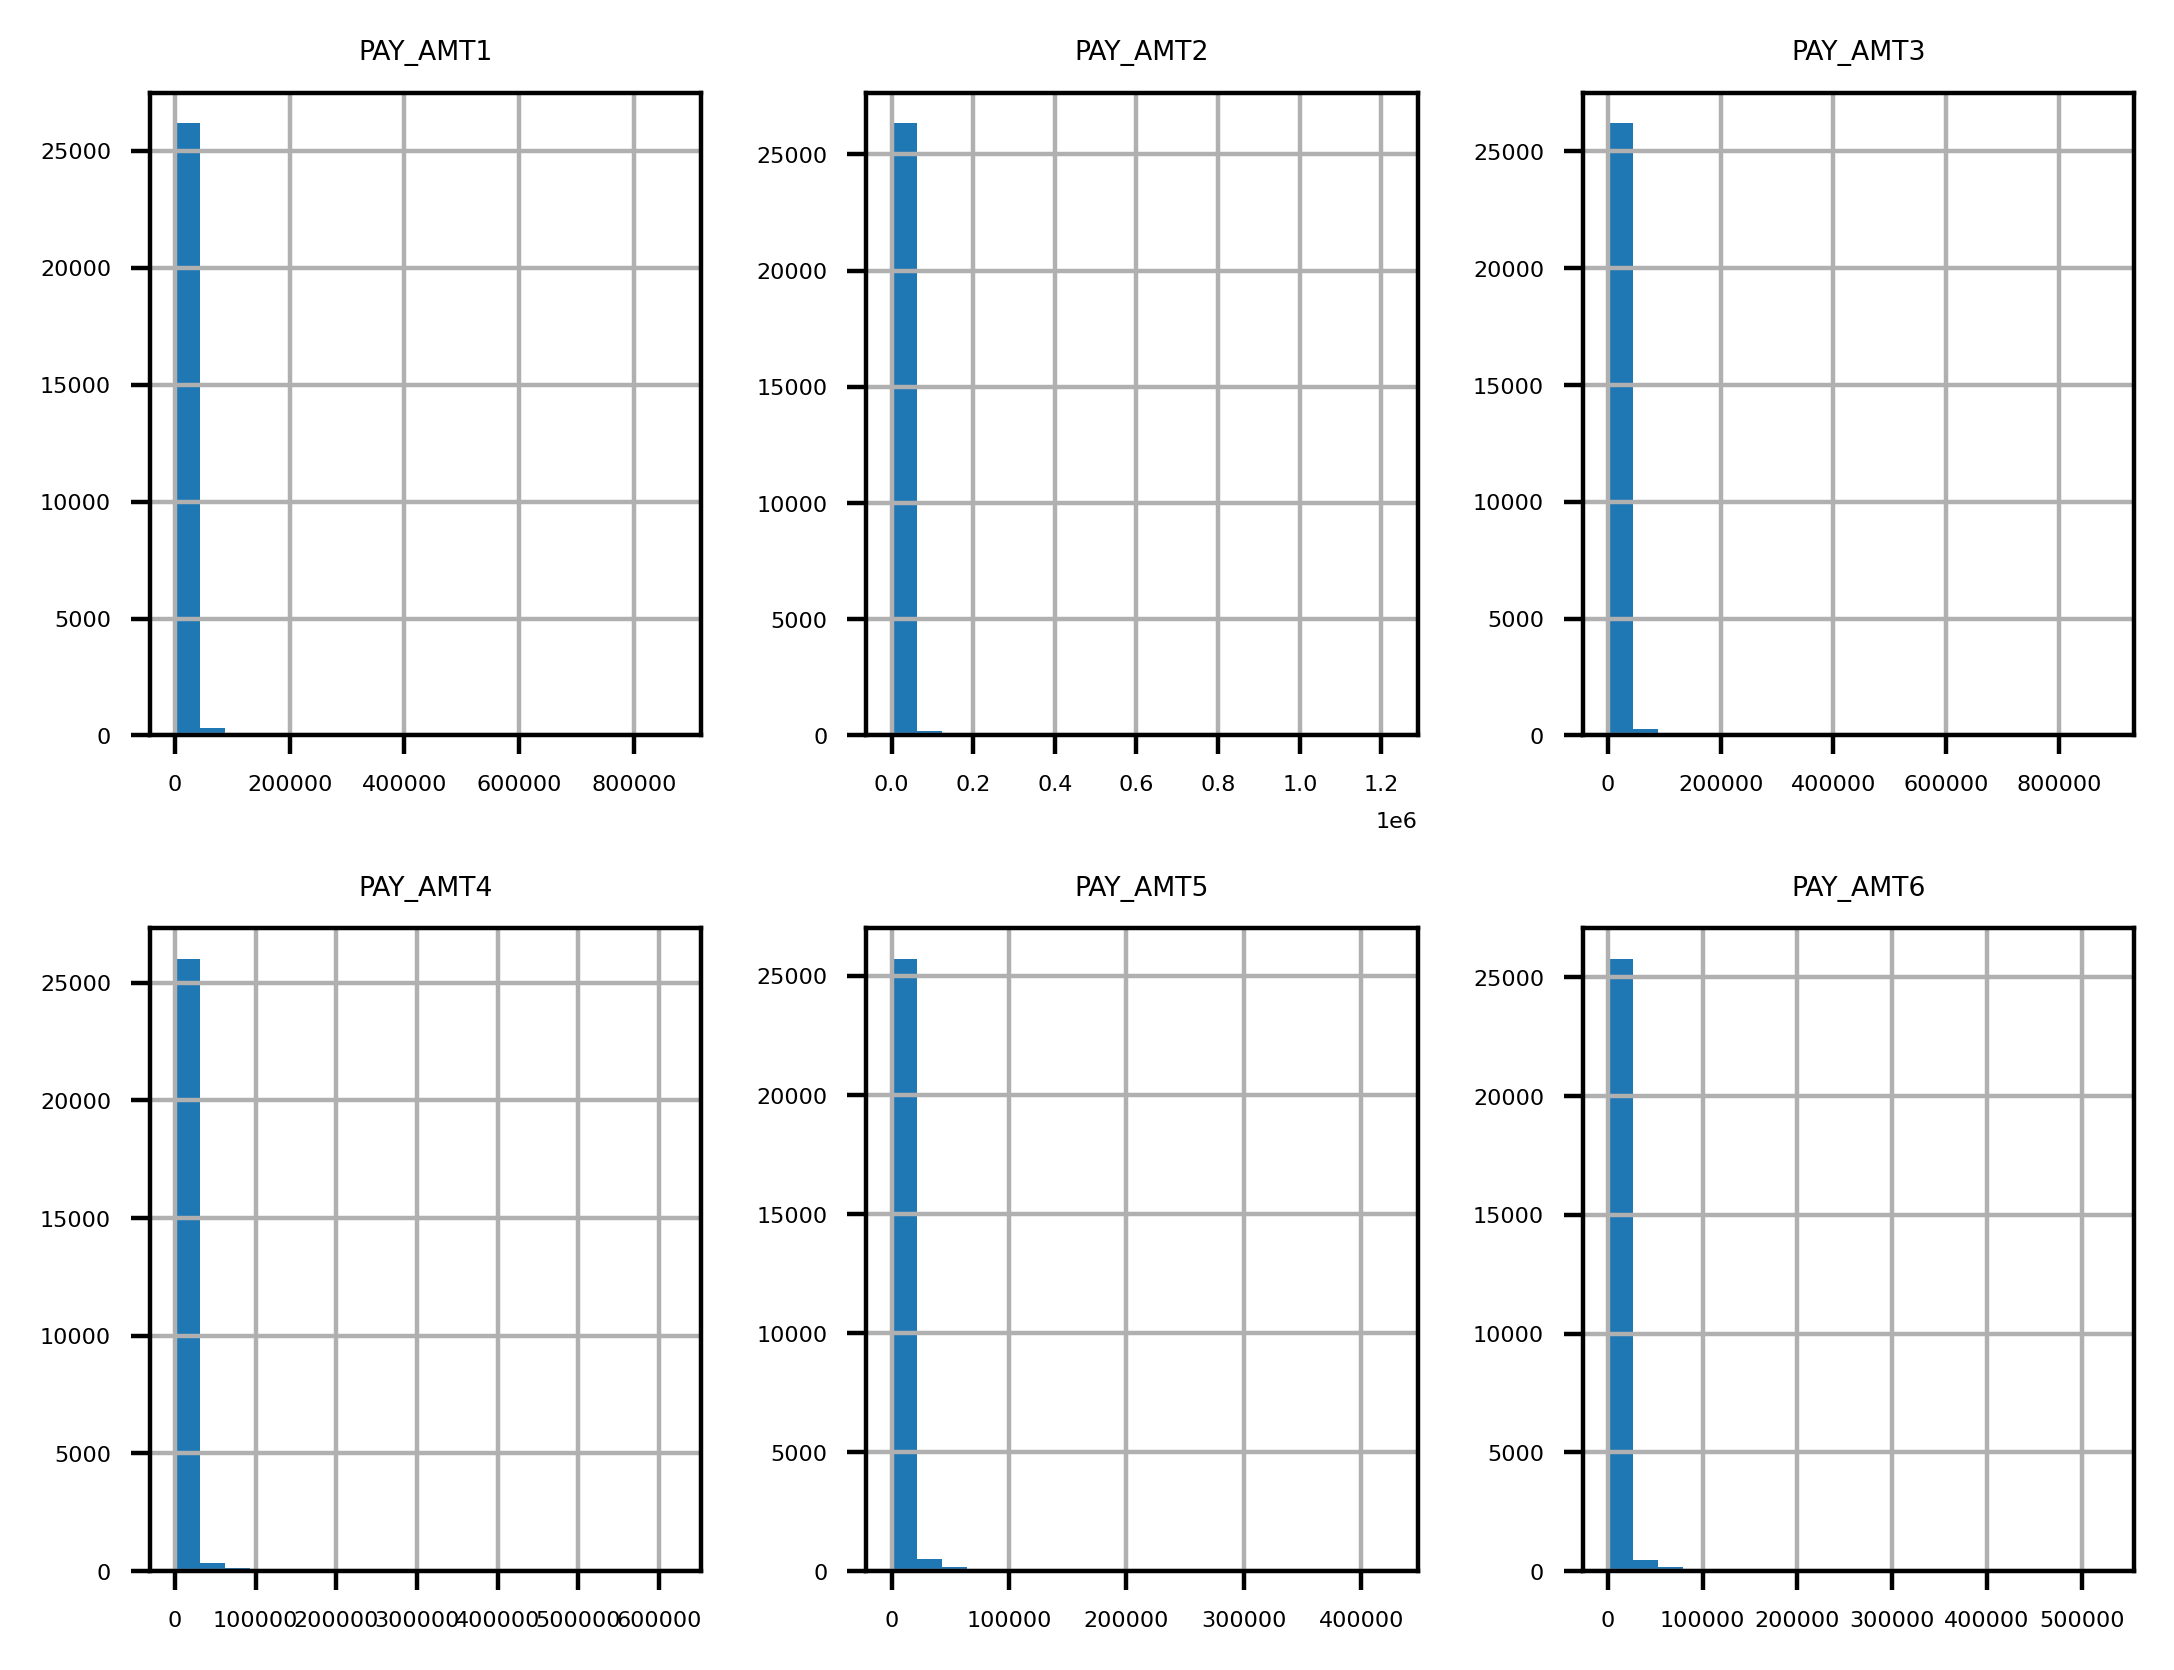

In [49]:
df[pay_amt_feats].hist(bins = 20, layout = (2,3))